In [1]:
library(rvest)
library(dplyr)
library(stringr)
library(rvest)
library(RSelenium)
library(countrycode)



Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'RSelenium' was built under R version 3.6.3"

# RSelenium
To run selenium first, I needed to download a web driver for chrome and a selenium program. Then using the command line, I run a line of code to start the web driver and selenium program. "java -Dwebdriver.chrome.driver="C:\Users/hayden\Downloads\chromedriver.exe" -jar selenium-server-standalone-3.141.59.jar". I used the port number the selenium server was running on to connect it to R using the R selenium package.  

In [2]:
# This code creates a connection to the selenium server
con <- remoteDriver(remoteServerAddr = "localhost", 
                    port = 4444,
                    browserName = "chrome"
)

In [3]:
#this code opens up the connection
con$open()

[1] "Connecting to remote server"
$acceptInsecureCerts
[1] FALSE

$browserName
[1] "chrome"

$browserVersion
[1] "94.0.4606.81"

$chrome
$chrome$chromedriverVersion
[1] "94.0.4606.61 (418b78f5838ed0b1c69bb4e51ea0252171854915-refs/branch-heads/4606@{#1204})"

$chrome$userDataDir
[1] "C:\\Users\\hayde\\AppData\\Local\\Temp\\scoped_dir4932_66342293"


$`goog:chromeOptions`
$`goog:chromeOptions`$debuggerAddress
[1] "localhost:53340"


$networkConnectionEnabled
[1] FALSE

$pageLoadStrategy
[1] "normal"

$platformName
[1] "windows"

$proxy
named list()

$setWindowRect
[1] TRUE

$strictFileInteractability
[1] FALSE

$timeouts
$timeouts$implicit
[1] 0

$timeouts$pageLoad
[1] 300000

$timeouts$script
[1] 30000


$unhandledPromptBehavior
[1] "dismiss and notify"

$`webauthn:extension:credBlob`
[1] TRUE

$`webauthn:extension:largeBlob`
[1] TRUE

$`webauthn:virtualAuthenticators`
[1] TRUE

$webdriver.remote.sessionid
[1] "27e9e90f7d1e6a96b99a145335ed97ac"

$id
[1] "27e9e90f7d1e6a96b99a145335ed97ac

In [4]:
#this code navigates the Selenium server to the desired webpage
con$navigate("https://www.cia.gov/the-world-factbook/field/urbanization/")

In [5]:
#this code extracts the HTML code from the server
urban_html <- con$getPageSource()[[1]]

In [6]:
#this code reads in the contents of the HTML file to be used by rvest
page <- read_html(urban_html)

In [7]:
#This code extracts the country name from the HTML script
country <- page %>% html_nodes(".content-area-content a") %>% html_text()
country

[1] "Afghanistan"                                  
  [2] "Albania"                                      
  [3] "Algeria"                                      
  [4] "American Samoa"                               
  [5] "Andorra"                                      
  [6] "Angola"                                       
  [7] "Anguilla"                                     
  [8] "Antigua and Barbuda"                          
  [9] "Argentina"                                    
 [10] "Armenia"                                      
 [11] "Aruba"                                        
 [12] "Australia"                                    
 [13] "Austria"                                      
 [14] "Azerbaijan"                                   
 [15] "Bahamas, The"                                 
 [16] "Bahrain"                                      
 [17] "Bangladesh"                                   
 [18] "Barbados"                                     
 [19] "Belarus"                                      
 [20] "Belgium"                                      
 [21] "Belize"                                       
 [22] "Benin"                                        
 [23] "Bermuda"                                      
 [24] "Bhutan"                                       
 [25] "Bolivia"                                      
 [26] "Bosnia and Herzegovina"                       
 [27] "Botswana"                                     
 [28] "Brazil"                                       
 [29] "British Virgin Islands"                       
 [30] "Brunei"                                       
 [31] "Bulgaria"                                     
 [32] "Burkina Faso"                                 
 [33] "Burma"                                        
 [34] "Burundi"                                      
 [35] "Cabo Verde"                                   
 [36] "Cambodia"                                     
 [37] "Cameroon"                                     
 [38] "Canada"                                       
 [39] "Cayman Islands"                               
 [40] "Central African Republic"                     
 [41] "Chad"                                         
 [42] "Chile"                                        
 [43] "China"                                        
 [44] "Colombia"                                     
 [45] "Comoros"                                      
 [46] "Congo, Democratic Republic of the"            
 [47] "Congo, Republic of the"                       
 [48] "Cook Islands"                                 
 [49] "Costa Rica"                                   
 [50] "Cote d'Ivoire"                                
 [51] "Croatia"                                      
 [52] "Cuba"                                         
 [53] "Curacao"                                      
 [54] "Cyprus"                                       
 [55] "Czechia"                                      
 [56] "Denmark"                                      
 [57] "Djibouti"                                     
 [58] "Dominica"                                     
 [59] "Dominican Republic"                           
 [60] "Ecuador"                                      
 [61] "Egypt"                                        
 [62] "El Salvador"                                  
 [63] "Equatorial Guinea"                            
 [64] "Eritrea"                                      
 [65] "Estonia"                                      
 [66] "Eswatini"                                     
 [67] "Ethiopia"                                     
 [68] "Falkland Islands (Islas Malvinas)"            
 [69] "Faroe Islands"                                
 [70] "Fiji"                                         
 [71] "Finland"                                      
 [72] "France"                                       
 [73] "French Polynesia"                             
 [74] "Gabon"                                        
 [75] 

In [8]:
#This code extracts the sentence that contains the urbanisation rate and the yearly change in urbanisation
country_urban_rate <- page %>% html_nodes("li p") %>% html_text()

In [9]:
#This code extracts the variables urbanisation rate and the yearly change in urbanisation from the sentence
urbanisation_rate <-  str_match(country_urban_rate, "urban population:\\s*(.*?)\\s*% of total population")[,2]
urbanisation_yearly_change <-  str_match(country_urban_rate, "rate of urbanization:\\s*(.*?)\\s*% annual rate of change")[,2]

In [10]:
#This code combines the 3 variables into a data frame
urban_df <- data.frame(country, urbanisation_rate, urbanisation_yearly_change)
urban_df

country,urbanisation_rate,urbanisation_yearly_change
Afghanistan,26.3,3.34
Albania,63,1.29
Algeria,74.3,1.99
American Samoa,87.2,0.26
Andorra,87.9,0.11
Angola,67.5,4.04
Anguilla,100,0.47
Antigua and Barbuda,24.4,0.87
Argentina,92.2,0.97
Armenia,63.4,0.23


In [11]:
#This code gets the HTML script for the population variable
con$navigate("https://www.cia.gov/the-world-factbook/field/population/country-comparison?fbclid=IwAR2jG4pZYN8gcvnSppY9VOROoqQIiAA48EIVy24LKpwlEpoHHTNJJcalVmU")
population_html <- con$getPageSource()[[1]]


In [12]:
#This code extracts the table containing the population variable from the HTML script
pop_page <- read_html(population_html)
pop_table <- pop_page %>% html_node("table") %>% html_table()
colnames(pop_table) <- c("rank", "country", "population", "date_of_Information")
pop_table

rank,country,population,date_of_Information
1,China,"1,397,897,720",July 2021 est.
2,India,"1,339,330,514",July 2021 est.
3,United States,"334,998,398",July 2021 est.
4,Indonesia,"275,122,131",July 2021 est.
5,Pakistan,"238,181,034",July 2021 est.
6,Nigeria,"219,463,862",July 2021 est.
7,Brazil,"213,445,417",July 2021 est.
8,Bangladesh,"164,098,818",July 2021 est.
9,Russia,"142,320,790",July 2021 est.
10,Mexico,"130,207,371",July 2021 est.


In [13]:
#This code makes the population variable a numeric value by removing commas
pop_table$population <- as.numeric(gsub(",","",pop_table$population))
pop_table

rank,country,population,date_of_Information
1,China,1397897720,July 2021 est.
2,India,1339330514,July 2021 est.
3,United States,334998398,July 2021 est.
4,Indonesia,275122131,July 2021 est.
5,Pakistan,238181034,July 2021 est.
6,Nigeria,219463862,July 2021 est.
7,Brazil,213445417,July 2021 est.
8,Bangladesh,164098818,July 2021 est.
9,Russia,142320790,July 2021 est.
10,Mexico,130207371,July 2021 est.


In [14]:
# This code gets HTML script containing the size variable

con$navigate("https://www.cia.gov/the-world-factbook/field/area/country-comparison")
size_html <- con$getPageSource()[[1]]

In [15]:
#This code extracts the table containing the size variable from the HTML script

size_page <- read_html(size_html)
size_table <- size_page %>% html_node("table") %>% html_table() %>% select(1:3)
colnames(size_table) <- c("rank", "country", "size")
size_table

rank,country,size
1,Russia,"17,098,242"
2,Antarctica,"14,200,000"
3,Canada,"9,984,670"
4,United States,"9,833,517"
5,China,"9,596,960"
6,Brazil,"8,515,770"
7,Australia,"7,741,220"
8,India,"3,287,263"
9,Argentina,"2,780,400"
10,Kazakhstan,"2,724,900"


In [16]:
#This code makes the size variable a numeric value by removing the commas
size_table$size <- as.numeric(gsub(",","",size_table$size))
size_table

rank,country,size
1,Russia,17098242
2,Antarctica,14200000
3,Canada,9984670
4,United States,9833517
5,China,9596960
6,Brazil,8515770
7,Australia,7741220
8,India,3287263
9,Argentina,2780400
10,Kazakhstan,2724900


In [17]:
#This code gets the HTML script for the GDP per capita variable
con$navigate("https://www.cia.gov/the-world-factbook/field/real-gdp-per-capita/country-comparison")
gdp_html <- con$getPageSource()[[1]]

In [18]:
#This code extracts the table containing the real GDP per capita variable from the HTML script
gdp_page = read_html(gdp_html)
GDP_table <- gdp_page %>% html_node("table") %>% html_table()
names(GDP_table) <- c("rank", "country", "gdp_per_cap", "date")
GDP_table

rank,country,gdp_per_cap,date
1,Liechtenstein,"$139,100",2009 est.
2,Macau,"$123,965",2019 est.
3,Monaco,"$115,700",2015 est.
4,Luxembourg,"$114,482",2019 est.
5,Singapore,"$97,341",2019 est.
6,Qatar,"$90,044",2019 est.
7,Ireland,"$86,781",2019 est.
8,Isle of Man,"$84,600",2014 est.
9,Bermuda,"$81,798",2019 est.
10,Cayman Islands,"$71,549",2018 est.


In [19]:
#This code makes the size variable a numeric value by removing the commas and the dollar sign
GDP_table$gdp_per_cap <- GDP_table$gdp_per_cap %>%
    gsub(",","", .) %>%
    gsub("\\$", "", .) %>%
    as.integer()
GDP_table


rank,country,gdp_per_cap,date
1,Liechtenstein,139100,2009 est.
2,Macau,123965,2019 est.
3,Monaco,115700,2015 est.
4,Luxembourg,114482,2019 est.
5,Singapore,97341,2019 est.
6,Qatar,90044,2019 est.
7,Ireland,86781,2019 est.
8,Isle of Man,84600,2014 est.
9,Bermuda,81798,2019 est.
10,Cayman Islands,71549,2018 est.


In [20]:
# this code joins together the urban_df, GDP_table, size_table, pop_table. This also code removes all the rows 
#that do not have value for all variables as all the united nation recognised states are 
#included in the final data set while the remainders are Proto-states. 

final_df <- merge(urban_df, GDP_table[,c(2,3)], by= "country")
final_df <- merge(final_df, size_table[, c(2,3)], by= "country")
final_df <- merge(final_df, pop_table[, c(2,3)], by= "country")
str(final_df)

'data.frame':	225 obs. of  6 variables:
 $ country                   : Factor w/ 230 levels "Afghanistan",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ urbanisation_rate         : Factor w/ 187 levels "0","100","13.5",..: 20 95 126 160 164 106 2 15 175 97 ...
 $ urbanisation_yearly_change: Factor w/ 177 levels "-0.03","-0.11",..: 145 80 110 24 16 160 37 59 66 22 ...
 $ gdp_per_cap               : int  2065 13965 11511 11200 49900 6670 12200 21910 22064 13654 ...
 $ size                      : num  652230 28748 2381740 224 468 ...
 $ population                : num  37466414 3088385 43576691 46366 85645 ...


In [24]:
#This code creates a vector of country codes using countrycode function. 
country_code <- countrycode(final_df$country, 'country.name', 'iso3c')

In [26]:
country_code

[1] "AFG" "ALB" "DZA" "ASM" "AND" "AGO" "AIA" "ATG" "ARG" "ARM" "ABW" "AUS"
 [13] "AUT" "AZE" "BHS" "BHR" "BGD" "BRB" "BLR" "BEL" "BLZ" "BEN" "BMU" "BTN"
 [25] "BOL" "BIH" "BWA" "BRA" "VGB" "BRN" "BGR" "BFA" "MMR" "BDI" "CPV" "KHM"
 [37] "CMR" "CAN" "CYM" "CAF" "TCD" "CHL" "CHN" "COL" "COM" "COD" "COG" "COK"
 [49] "CRI" "CIV" "HRV" "CUB" "CUW" "CYP" "CZE" "DNK" "DJI" "DMA" "DOM" "ECU"
 [61] "EGY" "SLV" "GNQ" "ERI" "EST" "SWZ" "ETH" "FLK" "FRO" "FJI" "FIN" "FRA"
 [73] "PYF" "GAB" "GMB" "PSE" "GEO" "DEU" "GHA" "GIB" "GRC" "GRL" "GRD" "GUM"
 [85] "GTM" "GGY" "GIN" "GNB" "GUY" "HTI" "HND" "HKG" "HUN" "ISL" "IND" "IDN"
 [97] "IRN" "IRQ" "IRL" "IMN" "ISR" "ITA" "JAM" "JPN" "JEY" "JOR" "KAZ" "KEN"
[109] "KIR" "PRK" "KOR" "KWT" "KGZ" "LAO" "LVA" "LBN" "LSO" "LBR" "LBY" "LIE"
[121] "LTU" "LUX" "MAC" "MDG" "MWI" "MYS" "MDV" "MLI" "MLT" "MHL" "MRT" "MUS"
[133] "MEX" "FSM" "MDA" "MCO" "MNG" "MNE" "MSR" "MAR" "MOZ" "NAM" "NRU" "NPL"
[145] "NLD" "NCL" "NZL" "NIC" "NER" "NGA" "NIU" "MNP" "NOR" "OMN" "PAK" "PLW"
[157] "PAN" "PNG" "PRY" "PER" "PHL" "POL" "PRT" "PRI" "QAT" "ROU" "RUS" "RWA"
[169] "SHN" "KNA" "LCA" "SPM" "VCT" "WSM" "SMR" "STP" "SAU" "SEN" "SRB" "SYC"
[181] "SLE" "SGP" "SXM" "SVK" "SVN" "SLB" "ZAF" "SSD" "ESP" "LKA" "SDN" "SUR"
[193] "SWE" "CHE" "SYR" "TWN" "TJK" "TZA" "THA" "TLS" "TGO" "TKL" "TON" "TTO"
[205] "TUN" "TUR" "TKM" "TCA" "TUV" "UGA" "UKR" "ARE" "GBR" "USA" "URY" "UZB"
[217] "VUT" "VEN" "VNM" NA    "WLF" "PSE" "YEM" "ZMB" "ZWE"

In [27]:
#this script creates the density variable by dividing size by population
final_df <- final_df %>%
    mutate(density = round(population / size ,2) )
final_df

country,urbanisation_rate,urbanisation_yearly_change,gdp_per_cap,size,population,density
Afghanistan,26.3,3.34,2065,652230,37466414,57.44
Albania,63,1.29,13965,28748,3088385,107.43
Algeria,74.3,1.99,11511,2381740,43576691,18.30
American Samoa,87.2,0.26,11200,224,46366,206.99
Andorra,87.9,0.11,49900,468,85645,183.00
Angola,67.5,4.04,6670,1246700,33642646,26.99
Anguilla,100,0.47,12200,91,18403,202.23
Antigua and Barbuda,24.4,0.87,21910,443,99175,223.87
Argentina,92.2,0.97,22064,2780400,45864941,16.50
Armenia,63.4,0.23,13654,29743,3011609,101.25


In [ ]:
#This code combines the country code into final data frame
final_df <- cbind(final_df,country_code)

In [31]:
final_df 

X,country,urbanisation_rate,urbanisation_yearly_change,gdp_per_cap,size,population,density,country_code
1,Afghanistan,26.3,3.34,2065,652230,37466414,57.44,AFG
2,Albania,63.0,1.29,13965,28748,3088385,107.43,ALB
3,Algeria,74.3,1.99,11511,2381740,43576691,18.30,DZA
4,American Samoa,87.2,0.26,11200,224,46366,206.99,ASM
5,Andorra,87.9,0.11,49900,468,85645,183.00,AND
6,Angola,67.5,4.04,6670,1246700,33642646,26.99,AGO
7,Anguilla,100.0,0.47,12200,91,18403,202.23,AIA
8,Antigua and Barbuda,24.4,0.87,21910,443,99175,223.87,ATG
9,Argentina,92.2,0.97,22064,2780400,45864941,16.50,ARG
10,Armenia,63.4,0.23,13654,29743,3011609,101.25,ARM


In [32]:
#This code creates a CSV file
write.csv(final_df, "DataFrame.csv")

In [29]:
#This code closes the connection to the selenium server
con$close()

In [1]:
# import libraries
library(tidyverse)
library(dplyr)
library(skimr)
library(stringr)
library(magrittr)
library(oxcgrt)
library(httr)
library(rvest)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.5     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.0.2     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract



Attaching package: 'rvest'


The following object is masked from 'package:readr':

    guess_encoding




In [2]:
#read a csv file
cases <- "https://covid19.who.int/WHO-COVID-19-global-table-data.csv"

cases_df <- read_csv(cases)

Rows: 238 Columns: 12

-- Column specification --------------------------------------------------------
Delimiter: ","
chr (2): Name, WHO Region
dbl (9): Cases - cumulative total, Cases - cumulative total per 100000 popul...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [3]:
#to know the structure of cases data frame
str(cases_df)

spec_tbl_df [238 x 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Name                                                        :

Warning message:
"One or more parsing issues, see `problems()` for details"


 chr [1:238] "Global" "United States of America" "India" "Brazil" ...
 $ WHO Region                                                  : chr [1:238] NA "Americas" "South-East Asia" "Americas" ...
 $ Cases - cumulative total                                    : num [1:238] 2.44e+08 4.53e+07 3.42e+07 2.17e+07 8.85e+06 ...
 $ Cases - cumulative total per 100000 population              : num [1:238] 3135 13673 2479 10226 13041 ...
 $ Cases - newly reported in last 7 days                       : num [1:238] 2928891 471622 106657 83650 312035 ...
 $ Cases - newly reported in last 7 days per 100000 population : num [1:238] 37.58 142.48 7.73 39.35 459.65 ...
 $ Cases - newly reported in last 24 hours                     : num [1:238] 468545 105136 13451 5797 43453 ...
 $ Deaths - cumulative total                                   : num [1:238] 4961489 732512 455653 605804 139834 ...
 $ Deaths - cumulative total per 100000 population             : num [1:238] 63.7 221.3 33 285 206 ...
 $ Deaths -

In [4]:
cases_df

Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Global,NA,244385444,3135.341,2928891,37.57619,468545,4961489,63.65339,48733,0.6252197,7192
United States of America,Americas,45258928,13673.283,471622,142.48300,105136,732512,221.30100,9668,2.9210000,1274
India,South-East Asia,34215653,2479.387,106657,7.72900,13451,455653,33.01800,3002,0.2180000,585
Brazil,Americas,21735560,10225.640,83650,39.35400,5797,605804,285.00500,2339,1.1000000,160
The United Kingdom,Europe,8853231,13041.320,312035,459.64600,43453,139834,205.98400,982,1.4470000,263
Russian Federation,Europe,8352601,5723.529,257776,176.63800,36582,233898,160.27600,7545,5.1700000,1123
Turkey,Europe,7909111,9377.755,194732,230.89200,29643,69559,82.47500,1499,1.7770000,215
France,Europe,6911563,10626.739,36006,55.36000,6481,115168,177.07400,182,0.2800000,47
Iran (Islamic Republic of),Eastern Mediterranean,5877456,6997.559,67489,80.35100,9096,125519,149.44000,1096,1.3050000,156


In [5]:
#Using the dplyr functions to manipulate the dataframe
#selected few columns, renamed and filtered
cases_df<-cases_df %>% 
    select(Name, 'Cases - cumulative total', 'Deaths - cumulative total', 'WHO Region') %>%
    rename(country_name = Name,
           region = 'WHO Region',
           total_cases = 'Cases - cumulative total',
           total_deaths = 'Deaths - cumulative total') %>%
    filter(!country_name=='Global')
cases_df

country_name,total_cases,total_deaths,region
<chr>,<dbl>,<dbl>,<chr>
United States of America,45258928,732512,Americas
India,34215653,455653,South-East Asia
Brazil,21735560,605804,Americas
The United Kingdom,8853231,139834,Europe
Russian Federation,8352601,233898,Europe
Turkey,7909111,69559,Europe
France,6911563,115168,Europe
Iran (Islamic Republic of),5877456,125519,Eastern Mediterranean
Argentina,5281585,115851,Americas


In [6]:
#used for country codes
library(countrycode)

In [7]:
#iso 3 character code for the country name
country_code <- countrycode(cases_df$country_name, 'country.name', 'iso3c')

Warning message in countrycode_convert(sourcevar = sourcevar, origin = origin, destination = dest, :
"Some values were not matched unambiguously: Bonaire, Kosovo[1], Other, Saba, Saint Martin, Sint Eustatius
"


In [8]:
#adding a new column country code by matching the country name
cases_df <- cases_df %>%
    add_column(country_code = if_else(.$country_name == countrycode(cases_df$country_name, 'country.name', 'iso3c'), country_code, country_code),
              .before="country_name")

Warning message in countrycode_convert(sourcevar = sourcevar, origin = origin, destination = dest, :
"Some values were not matched unambiguously: Bonaire, Kosovo[1], Other, Saba, Saint Martin, Sint Eustatius
"


In [9]:
#to combine three rows with same country code
country = c("Bonaire", "Saba", "Sint Eustatius")
c <- cases_df %>% filter(country_name %in% country) %>%
     summarize_if(is.numeric, sum, na.rm=TRUE) %>%
     mutate(country_name = "Bonaire,Saba,Sint Eustatius")

In [10]:
country_bes<- c %>% select(country_name, total_cases, total_deaths)

In [11]:
country_bes

country_name,total_cases,total_deaths
<chr>,<dbl>,<dbl>
"Bonaire,Saba,Sint Eustatius",2390,19


In [12]:
#drops three rows
cases_df <- cases_df[!(cases_df$country_name == "Bonaire" |
                       cases_df$country_name ==  "Saba" |
                       cases_df$country_name ==  "Sint Eustatius"),]

In [13]:
cases <- cases_df %>%
    filter(country_name == 'Bonaire,Sint Eustatius,Saba') %>%
    mutate(country_code = "BES")

In [14]:
cases_df<-cases_df[!(cases_df$country_name=="Other"),]


In [15]:
cases_df

country_code,country_name,total_cases,total_deaths,region
<chr>,<chr>,<dbl>,<dbl>,<chr>
USA,United States of America,45258928,732512,Americas
IND,India,34215653,455653,South-East Asia
BRA,Brazil,21735560,605804,Americas
GBR,The United Kingdom,8853231,139834,Europe
RUS,Russian Federation,8352601,233898,Europe
TUR,Turkey,7909111,69559,Europe
FRA,France,6911563,115168,Europe
IRN,Iran (Islamic Republic of),5877456,125519,Eastern Mediterranean
ARG,Argentina,5281585,115851,Americas


In [16]:
#changing the country name; old name to new name
cases_df$country_name[cases_df$contry_name == "Saint Martin"] <- 'Sint Maarten'

Warning message:
"Unknown or uninitialised column: `contry_name`."


In [17]:
cases_df<-cases_df [(!(cases_df$country_name=="Saint Martin") & !(cases_df$country_name=="Kosovo[1]")),]

In [18]:
cases_df

country_code,country_name,total_cases,total_deaths,region
<chr>,<chr>,<dbl>,<dbl>,<chr>
USA,United States of America,45258928,732512,Americas
IND,India,34215653,455653,South-East Asia
BRA,Brazil,21735560,605804,Americas
GBR,The United Kingdom,8853231,139834,Europe
RUS,Russian Federation,8352601,233898,Europe
TUR,Turkey,7909111,69559,Europe
FRA,France,6911563,115168,Europe
IRN,Iran (Islamic Republic of),5877456,125519,Eastern Mediterranean
ARG,Argentina,5281585,115851,Americas


In [19]:
#to collect the vaccine data
url_vaccines <- "https://covid19.who.int/who-data/vaccination-data.csv"

vaccines_df <- read_csv(url_vaccines)

Rows: 228 Columns: 14

-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (5): COUNTRY, ISO3, WHO_REGION, DATA_SOURCE, VACCINES_USED
dbl  (7): TOTAL_VACCINATIONS, PERSONS_VACCINATED_1PLUS_DOSE, TOTAL_VACCINATI...
date (2): DATE_UPDATED, FIRST_VACCINE_DATE


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [20]:
head(vaccines_df)

COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<dbl>
Falkland Islands (Malvinas),FLK,AMRO,OWID,2021-04-14,4407,2632,126.529,75.567,1775,50.962,AstraZeneca - AZD1222,NA,1
Saint Helena,SHN,AFRO,OWID,2021-05-05,7892,4361,129.995,71.833,3531,58.162,AstraZeneca - AZD1222,NA,1
Jersey,JEY,EURO,OWID,2021-10-18,162928,78261,151.145,72.601,74327,68.952,"Moderna - mRNA-1273, AstraZeneca - AZD1222, Pfizer BioNTech - Comirnaty",NA,3
Liechtenstein,LIE,OTHER,OWID,2021-10-21,48245,24829,124.513,64.080,24124,62.260,"Moderna - mRNA-1273, Pfizer BioNTech - Comirnaty",NA,2
Guernsey,GGY,EURO,OWID,2021-10-18,102548,NA,159.068,NA,NA,NA,"Moderna - mRNA-1273, AstraZeneca - AZD1222, Pfizer BioNTech - Comirnaty",NA,3
Isle of Man,IMN,EURO,OWID,2021-10-21,131628,67353,154.798,79.209,64275,75.589,"Moderna - mRNA-1273, AstraZeneca - AZD1222, Pfizer BioNTech - Comirnaty",NA,3


In [21]:
str(vaccines_df)

spec_tbl_df [228 x 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ COUNTRY                             : chr [1:228] "Falkland Islands (Malvinas)" "Saint Helena" "Jersey" "Liechtenstein" ...
 $ ISO3                                : chr [1:228] "FLK" "SHN" "JEY" "LIE" ...
 $ WHO_REGION                          : chr [1:228] "AMRO" "AFRO" "EURO" "OTHER" ...
 $ DATA_SOURCE                         : chr [1:228] "OWID" "OWID" "OWID" "OWID" ...
 $ DATE_UPDATED                        : Date[1:228], format: "2021-04-14" "2021-05-05" ...
 $ TOTAL_VACCINATIONS                  : num [1:228] 4407 7892 162928 48245 102548 ...
 $ PERSONS_VACCINATED_1PLUS_DOSE       : num [1:228] 2632 4361 78261 24829 NA ...
 $ TOTAL_VACCINATIONS_PER100           : num [1:228] 127 130 151 125 159 ...
 $ PERSONS_VACCINATED_1PLUS_DOSE_PER100: num [1:228] 75.6 71.8 72.6 64.1 NA ...
 $ PERSONS_FULLY_VACCINATED            : num [1:228] 1775 3531 74327 24124 NA ...
 $ PERSONS_FULLY_VACCINATED_PER100     : num [1:228] 51 58

In [22]:
#selecting the columns and renaming them
vaccines_df <- vaccines_df %>% 
    select(ISO3, COUNTRY, TOTAL_VACCINATIONS,
           PERSONS_VACCINATED_1PLUS_DOSE,
           PERSONS_FULLY_VACCINATED, 
           TOTAL_VACCINATIONS_PER100,
           FIRST_VACCINE_DATE,
           DATE_UPDATED) %>%
    rename(country_code = ISO3,
           country_name = COUNTRY,
           total_vaccinations = TOTAL_VACCINATIONS,
           vaccinated_1dose = PERSONS_VACCINATED_1PLUS_DOSE,
           fully_vacccinated = PERSONS_FULLY_VACCINATED,
           total_vaccinations_per100 = TOTAL_VACCINATIONS_PER100,
           first_vaccine_date = FIRST_VACCINE_DATE,
           last_updated_date = DATE_UPDATED)


In [23]:
vaccines_df

country_code,country_name,total_vaccinations,vaccinated_1dose,fully_vacccinated,total_vaccinations_per100,first_vaccine_date,last_updated_date
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<date>
FLK,Falkland Islands (Malvinas),4407,2632,1775,126.529,NA,2021-04-14
SHN,Saint Helena,7892,4361,3531,129.995,NA,2021-05-05
JEY,Jersey,162928,78261,74327,151.145,NA,2021-10-18
LIE,Liechtenstein,48245,24829,24124,124.513,NA,2021-10-21
GGY,Guernsey,102548,NA,NA,159.068,NA,2021-10-18
IMN,Isle of Man,131628,67353,64275,154.798,NA,2021-10-21
GIB,Gibraltar,84477,40173,39796,250.741,NA,2021-10-20
GRL,Greenland,77006,40104,36902,135.641,NA,2021-10-21
FRO,Faroe Islands,76516,39114,37402,156.587,NA,2021-10-21


In [24]:
#combine the data frame by country code and name
covid_df <- left_join(cases_df, vaccines_df, by=c('country_code', 'country_name'))

In [25]:
covid_df

country_code,country_name,total_cases,total_deaths,region,total_vaccinations,vaccinated_1dose,fully_vacccinated,total_vaccinations_per100,first_vaccine_date,last_updated_date
<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<date>
USA,United States of America,45258928,732512,Americas,423902300,237522038,205645913,128.066,2020-12-14,2021-10-22
IND,India,34215653,455653,South-East Asia,986769411,699116940,287652471,71.505,2021-01-16,2021-10-19
BRA,Brazil,21735560,605804,Americas,254011119,153755552,109815846,119.501,2021-01-17,2021-10-22
GBR,The United Kingdom,8853231,139834,Europe,94800164,49422753,45261635,139.600,2020-12-21,2021-10-18
RUS,Russian Federation,8352601,233898,Europe,94491689,49463056,45028077,64.700,NA,2021-10-13
TUR,Turkey,7909111,69559,Europe,112360409,54497626,46903485,133.200,NA,2021-10-13
FRA,France,6911563,115168,Europe,95249797,50862471,44387326,141.500,2020-12-30,2021-10-17
IRN,Iran (Islamic Republic of),5877456,125519,Eastern Mediterranean,72643522,48474187,24169335,86.488,2021-02-09,2021-10-17
ARG,Argentina,5281585,115851,Americas,57450735,32400490,25243273,127.115,2020-12-29,2021-10-22


In [26]:
#collecting raw data using API 
url <- GET("https://covidtrackerapi.bsg.ox.ac.uk/api/v2/stringency/date-range/{start-date}/{end-date}")

In [27]:
#search key is by latest date
stringency_df <- get_json_time(from = "2021-10-17") %>% get_data_time()

In [28]:
str(stringency_df)

tibble [1,418 x 9] (S3: tbl_df/tbl/data.frame)
 $ date_value            : Date[1:1418], format: "2021-10-17" "2021-10-17" ...
 $ country_code          : chr [1:1418] "NGA" "UKR" "GRC" "USA" ...
 $ country_name          : chr [1:1418] "Nigeria" "Ukraine" "Greece" "United States" ...
 $ confirmed             : int [1:1418] 209298 2757328 693886 44934357 460322 16621 308136 13396 12455 805037 ...
 $ deaths                : int [1:1418] 2837 64603 15375 724728 16209 129 4638 179 33 11284 ...
 $ stringency_actual     : num [1:1418] 50.9 58.3 71.8 56 38.9 ...
 $ stringency            : num [1:1418] 50.9 58.3 71.8 56 38.9 ...
 $ stringency_legacy     : num [1:1418] 63.8 71 77.4 60.2 47.1 ...
 $ stringency_legacy_disp: num [1:1418] 63.8 71 77.4 60.2 47.1 ...


In [29]:
#selecting the columns
stringency_df<- stringency_df %>% 
    select(country_code, stringency) 

In [30]:
head(stringency_df)

country_code,stringency
<chr>,<dbl>
NGA,50.93
UKR,58.33
GRC,71.76
USA,56.02
PRY,38.89
MUS,32.41


In [31]:
#combine the two dataframes by country code
covid_str_df <- left_join(covid_df, stringency_df, by=c('country_code'))

In [32]:
#removes the duplicate rows
covid_str_df <- covid_str_df[!duplicated(covid_str_df$country_code),]

In [34]:
write.csv(covid_str_df, "Covid_Data_New.csv")

The 2021 and 2020 raw data from ghcnd ~100mb each, are too large for github. Can download and extract 2021.csv.gz & 2020.csv.gz from https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/ 

In [1]:
using CSV
using DataFrames
using Statistics
using DataFramesMeta

Load data:

In [4]:
daily_2020 = CSV.File("2020.csv",header=0) |> DataFrame;
daily_2021 = CSV.File("2021.csv",header=0) |> DataFrame;
append!(daily_2021,daily_2021)
countries = CSV.File("fips-10-4-to-iso-country-codes.csv") |> DataFrame;

Select wanted data and rename appropriately, filter for only avg temp & precipitation data.

In [6]:
df = daily_2021;
select!(df,:Column1,:Column2,:Column3,:Column4);
rename!(df,[:station,:date,:element,:value]);
filter!(:element => element -> (element == "TAVG" || element == "PRCP"),df);

Change from 10th of Celsius and tenths of mm -> Celsius and mm

In [7]:
df.value = df.value./10;

Add new column for fips country code, which is a substring of the station names.

In [8]:
df.fips = SubString.(string.(df.station),1,2);

Find mean value for avg temp & precipitation for each country.

In [9]:
climate = combine(groupby(df,[:fips,:element]), :value=>mean=>:value);

Make long data frame into wide data frame, with seperate columns for tavg and prcp.
Doing this by making two subsets and joining them.

In [10]:
tavg = filter(:element => element -> (element == "TAVG"),climate);
rename!(tavg,:value=>:tavg);
select!(tavg,:fips,:tavg);
prcp = filter(:element => element -> (element == "PRCP"),climate);
rename!(prcp,:value=>:prcp);
select!(prcp,:fips,:prcp);

climate_wide = outerjoin(tavg,prcp,on=:fips);

Join the climate and country data together.

In [11]:
data = outerjoin(climate_wide, countries, on = :fips)

,fips,tavg,prcp,iso3166,Name
,SubStri…,Float64?,Float64?,String?,String?
1,AE,30.6095,0.0,AE,United Arab Emirates
2,AF,19.3022,3.32,AF,Afghanistan
3,AG,22.9381,0.783375,DZ,Algeria
4,AJ,17.3267,10.9522,AZ,Azerbaijan
5,AL,17.2345,missing,AL,Albania
6,AM,10.7996,3.05077,AM,Armenia
7,AO,24.737,12.404,AO,Angola
8,AQ,27.5725,9.63018,AS,American Samoa
9,AR,15.6661,6.17386,AR,Argentina


In [13]:
CSV.write("climate.csv",data)

"climate.csv"

In [1]:
using HTTP # requests the HTML information from the web server
using Gumbo # parses HTML data
using Cascadia # to select all the elements using selectors
using DataFrames #helps to work with a tabular data
using WorldBankData #provides the global development data, it is used for country codes
using CSV # exporting the dataframe into csv format 

##### https://www.oecd.org/about/members-and-partners/ to collect the 38 member countries

In [2]:
url = "https://www.oecd.org/about/members-and-partners/"

"https://www.oecd.org/about/members-and-partners/"

In [3]:
request = HTTP.get(url)

HTTP.Messages.Response:
"""
HTTP/1.1 200 OK
Content-Type: text/html
Last-Modified: Sat, 09 Oct 2021 09:54:09 GMT
ETag: "80f6be9af3bcd71:0"
Server: Microsoft-IIS/10.0
X-Powered-By: ASP.NET
X-Frame-Options: SAMEORIGIN
X-UA-Compatible: IE=9
Date: Fri, 22 Oct 2021 02:48:46 GMT
Content-Length: 79062

<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <title>Our global reach - OECD</title>
    
    <meta name="description" content="Today, our 38 Member countries span the globe, from North and South America to Europe and Asia-Pacific. Find out more about OECD members and partners" />
 <!-- description -->
    <meta name="keywords" content="member countries, oecd, members, oecd members, partners, oecd countries" />
 <!-- keywords -->
      
    <meta property="og:image" content="http://www.oecd.org/media/oecdorg/about/layer2pages/where-did-you

In [4]:
#Gumbo is used to parse the HTML, before parsing it is converted to String
html_doc = parsehtml(String(request.body))

HTML Document:
<!DOCTYPE html>
HTMLElement{:HTML}:<HTML lang="en">
  <head>
    <meta charset="utf-8"/>
    <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
    <meta content="width=device-width, initial-scale=1" name="viewport"/>
    <title>
      Our global reach - OECD
    </title>
    <meta content="Today, our 38 Member countries span the globe, from North and South America to Europe and Asia-Pacific. Find out more about OECD members and partners" name="description"/>
    <meta content="member countries, oecd, members, oecd members, partners, oecd countries" name="keywords"/>
    <meta content="http://www.oecd.org/media/oecdorg/about/layer2pages/where-did-you-know.jpg" property="og:image"/>
    <meta content="OECD member countries and partners" property="og:title"/>
    <meta content="Today, our 38 Member countries span the globe, from North and South America to Europe and Asia-Pacific. Find out more about OECD members and partners" property="og:description"/>
    <meta conte

In [5]:
body = html_doc.root[2]

HTMLElement{:body}:<body>
  <script>
        dataLayer = [{
            'siteName': "oecd.org",
            'siteEnvironment': "live",
            'pageLanguage': "en"
        }];
      </script>
  <script>(function (w, d, s, l, i) {
        w[l] = w[l] || [];
        w[l].push({
            'gtm.start':
                new Date().getTime(), event: 'gtm.js'
        });
        var f = d.getElementsByTagName(s)[0],
            j = d.createElement(s), dl = l != 'dataLayer' ? '&l=' + l : '';
        j.async = true;
        j.src = 'https://www.googletagmanager.com/gtm.js?id=' + i + dl;
        f.parentNode.insertBefore(j, f);
    })(window, document, 'script', 'dataLayer', 'GTM-P5JSM4P');  </script>
...


In [6]:
#Country names are in "#members a", which is an id and to extract each matching node
#in the XML document

sel_for_country_name = Selector("#members a")
country_list = eachmatch(sel_for_country_name,body)

38-element Vector{HTMLNode}:
 HTMLElement{:a}:<a class="country-list__country" href="https://www.oecd.org/australia">
  Australia
</a>


 HTMLElement{:a}:<a class="country-list__country" href="https://www.oecd.org/austria">
  Austria
</a>


 HTMLElement{:a}:<a class="country-list__country" href="https://www.oecd.org/belgium">
  Belgium
</a>


 HTMLElement{:a}:<a class="country-list__country" href="https://www.oecd.org/canada">
  Canada
</a>


 HTMLElement{:a}:<a class="country-list__country" href="https://www.oecd.org/chile">
  Chile
</a>


 HTMLElement{:a}:<a class="country-list__country" href="https://www.oecd.org/colombia/">
  Colombia
</a>


 HTMLElement{:a}:<a class="country-list__country" href="https://www.oecd.org/costarica/">
  Costa Rica
</a>


 HTMLElement{:a}:<a class="country-list__country" href="https://www.oecd.org/czech/">
  Czech Republic
</a>


 HTMLElement{:a}:<a class="country-list__country" href="https://www.oecd.org/denmark/">
  Denmark
</a>


 HTMLElement{:a}:<a c

In [7]:
country_name = nodeText.(country_list) 

38-element Vector{String}:
 "Australia"
 "Austria"
 "Belgium"
 "Canada"
 "Chile"
 "Colombia"
 "Costa Rica"
 "Czech Republic"
 "Denmark"
 "Estonia"
 "Finland"
 "France"
 "Germany"
 ⋮
 "New Zealand"
 "Norway"
 "Poland"
 "Portugal"
 "Slovak Republic"
 "Slovenia"
 "Spain"
 "Sweden"
 "Switzerland"
 "Turkey"
 "United Kingdom"
 "United States"

In [8]:
#Transforms the data into a Data frame
country_df = DataFrame(name = country_name)

,name
,String
1,Australia
2,Austria
3,Belgium
4,Canada
5,Chile
6,Colombia
7,Costa Rica
8,Czech Republic
9,Denmark


In [9]:
#To get the elements in "WorldBankData" package
names(WorldBankData)

3-element Vector{Symbol}:
 :WorldBankData
 :search_wdi
 :wdi

In [10]:
#search_wdi() is used along with a regular expression r"." to get all the country names and corresponding iso3c codes
wbd = search_wdi("countries", "iso3c", r".")
wbd_df = select!(wbd,:iso3c,:name)

,iso3c,name
,String,String
1,ABW,Aruba
2,AFE,Africa Eastern and Southern
3,AFG,Afghanistan
4,AFR,Africa
5,AFW,Africa Western and Central
6,AGO,Angola
7,ALB,Albania
8,AND,Andorra
9,ARB,Arab World


In [11]:
#Join country_df and wbd_df by country name  
country_df = leftjoin(country_df, wbd_df, on=:name, matchmissing=:equal, makeunique=true)

,name,iso3c
,String,String?
1,Australia,AUS
2,Austria,AUT
3,Belgium,BEL
4,Canada,CAN
5,Chile,CHL
6,Colombia,COL
7,Costa Rica,CRI
8,Czech Republic,CZE
9,Denmark,DNK


In [18]:
# Checking missing values
ismissing(country_df)

false

In [13]:
filter(row -> row.name == "Korea",country_df) 

,name,iso3c
,String,String?
1,Korea,missing


In [14]:
#searches for Korea in WorldBankData using regEx where i checks for case sensitivity
search_cname = search_wdi("countries","name",r"Korea"i)
search_cname[!, :name]

2-element Vector{String}:
 "Korea, Rep."
 "Korea, Dem. People's Rep."

In [15]:
search_cname[!, :iso3c]

2-element Vector{String}:
 "KOR"
 "PRK"

In [16]:
#Replacing the missing value with "KOR" for iso3c
country_df[(country_df.name .=="Korea"), :iso3c] .= "KOR"

1-element view(::Vector{Union{Missing, String}}, [21]) with eltype Union{Missing, String}:
 "KOR"

In [17]:
country_df

,name,iso3c
,String,String?
1,Australia,AUS
2,Austria,AUT
3,Belgium,BEL
4,Canada,CAN
5,Chile,CHL
6,Colombia,COL
7,Costa Rica,CRI
8,Czech Republic,CZE
9,Denmark,DNK


In [18]:
#Export Dataframe into .csv file
CSV.write("OECD_country_codes.csv", country_df)

"OECD_country_codes.csv"

In [1]:
#installing packages
library(dplyr)
library(tidyverse)
#install.packages("countrycode")
library(countrycode)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.3     v stringr 1.4.0
v tidyr   1.1.3     v forcats 0.5.1
v readr   2.0.0     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'countrycode' was built under R version 4.1.1"


In [2]:
# read the datasets
climate_data <- read.csv("climate.csv")
population_data <- read.csv("PopulationData.csv")
covid_data <- read.csv("Covid_Data_New.csv")
oecd_data <- read.csv("OECD_country_codes.csv")
head(climate_data)
head(population_data)
head(covid_data)
head(oecd_data)
count(population_data)
count(covid_data)

,fips,tavg,prcp,iso3166,Name
,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,AE,30.60948,0.0000000,AE,United Arab Emirates
2,AF,19.30219,3.3200000,AF,Afghanistan
3,AG,22.93812,0.7833752,DZ,Algeria
4,AJ,17.32671,10.9521967,AZ,Azerbaijan
5,AL,17.23447,NA,AL,Albania
6,AM,10.79957,3.0507692,AM,Armenia


,X,country,urbanisation_rate,urbanisation_yearly_change,gdp_per_cap,size,population,density,country_code
,<int>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<chr>
1,1,Afghanistan,26.3,3.34,2065,652230,37466414,57.44,AFG
2,2,Albania,63.0,1.29,13965,28748,3088385,107.43,ALB
3,3,Algeria,74.3,1.99,11511,2381740,43576691,18.30,DZA
4,4,American Samoa,87.2,0.26,11200,224,46366,206.99,ASM
5,5,Andorra,87.9,0.11,49900,468,85645,183.00,AND
6,6,Angola,67.5,4.04,6670,1246700,33642646,26.99,AGO


,X,country_code,country_name,total_cases,total_deaths,total_vaccinations,vaccinated_1dose,fully_vacccinated,total_vaccinations_per100,first_vaccine_date,last_updated_date,stringency
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>
1,1,USA,United States of America,44408612,715179,416110353,233521350,203896677,125.712,2020-12-14,2021-10-15,61.57
2,2,IND,India,34081315,452290,951984373,683009792,268974581,68.984,2021-01-16,2021-10-11,54.17
3,3,BRA,Brazil,21597949,601574,246737803,151223500,105063574,116.079,2021-01-17,2021-10-15,40.28
4,4,GBR,The United Kingdom,8449169,138584,94376101,49186920,45073591,139.000,2020-12-21,2021-10-12,41.20
5,5,RUS,Russian Federation,8027012,224310,94491689,49463056,45028077,64.700,NA,2021-10-13,54.17
6,6,TUR,Turkey,7654277,67623,112360409,54497626,46903485,133.200,NA,2021-10-13,58.33


,name,iso3c
,<chr>,<chr>
1,Australia,AUS
2,Austria,AUT
3,Belgium,BEL
4,Canada,CAN
5,Chile,CHL
6,Colombia,COL


n
<int>
225


n
<int>
231


In [3]:
# join the covid and population datasets into one dataframe
Main_DataFrame1 <- inner_join(covid_data, population_data, by=c("country_code")) %>%
  select(country_code, country_name, total_cases, total_deaths, total_vaccinations, vaccinated_1dose, fully_vacccinated, 
        total_vaccinations_per100, first_vaccine_date, last_updated_date, stringency, population, urbanisation_rate, urbanisation_yearly_change,
       gdp_per_cap,density) %>% as.data.frame()



head(Main_DataFrame1)
count(Main_DataFrame1)
summary(Main_DataFrame1)

,country_code,country_name,total_cases,total_deaths,total_vaccinations,vaccinated_1dose,fully_vacccinated,total_vaccinations_per100,first_vaccine_date,last_updated_date,stringency,population,urbanisation_rate,urbanisation_yearly_change,gdp_per_cap,density
,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>
1,USA,United States of America,44408612,715179,416110353,233521350,203896677,125.712,2020-12-14,2021-10-15,61.57,334998398,82.9,0.96,62530,34.07
2,IND,India,34081315,452290,951984373,683009792,268974581,68.984,2021-01-16,2021-10-11,54.17,1339330514,35.4,2.33,6700,407.43
3,BRA,Brazil,21597949,601574,246737803,151223500,105063574,116.079,2021-01-17,2021-10-15,40.28,213445417,87.3,0.87,14652,25.06
4,GBR,The United Kingdom,8449169,138584,94376101,49186920,45073591,139.000,2020-12-21,2021-10-12,41.20,67081000,84.2,0.80,46659,275.36
5,RUS,Russian Federation,8027012,224310,94491689,49463056,45028077,64.700,NA,2021-10-13,54.17,142320790,74.9,0.11,27044,8.32
6,TUR,Turkey,7654277,67623,112360409,54497626,46903485,133.200,NA,2021-10-13,58.33,82482383,76.6,1.11,28424,105.27


n
<int>
221


 country_code       country_name        total_cases        total_deaths   
 Length:221         Length:221         Min.   :       0   Min.   :     0  
 Class :character   Class :character   1st Qu.:   10860   1st Qu.:   130  
 Mode  :character   Mode  :character   Median :  116665   Median :  1531  
                                       Mean   : 1086427   Mean   : 22088  
                                       3rd Qu.:  531648   3rd Qu.:  9510  
                                       Max.   :44408612   Max.   :715179  
                                                                          
 total_vaccinations  vaccinated_1dose    fully_vacccinated  
 Min.   :1.936e+03   Min.   :9.680e+02   Min.   :9.680e+02  
 1st Qu.:2.183e+05   1st Qu.:1.337e+05   1st Qu.:8.982e+04  
 Median :1.790e+06   Median :8.820e+05   Median :7.085e+05  
 Mean   :3.041e+07   Mean   :1.757e+07   Mean   :1.304e+07  
 3rd Qu.:1.094e+07   3rd Qu.:5.834e+06   3rd Qu.:4.746e+06  
 Max.   :2.228e+09   Max.   :1.155

In [4]:
#Change the column name in climate_data from Name to country_name
colnames(climate_data)[colnames(climate_data) == "iso3166"] <- "country_code"
colnames(climate_data)[colnames(climate_data) == "Name"] <- "country_name"
colnames(climate_data)[colnames(climate_data) == "tavg"] <- "avg_temperature"
colnames(climate_data)[colnames(climate_data) == "prcp"] <- "precipitation"
climate_data$country_code = countrycode(climate_data$country_name, "country.name", "iso3c")

head(climate_data)
summary(climate_data)
climate_data1 <- climate_data %>% mutate_if(is.numeric, round, digits = 2)
head(climate_data1)

Warning message in countrycode_convert(sourcevar = sourcevar, origin = origin, destination = dest, :
"Some values were not matched unambiguously: Akrotiri, Ashmore and Cartier Islands, Baker Island, Clipperton Island, Coral Sea Islands, Dhekelia, Etorofu, Habomai, Kunashiri, and Shikotan Islands, Europa Island, Glorioso Islands, Howland Island, Jan Mayen, Jarvis Island, Johnston Atoll, Juan de Nova Island, Kingman Reef, Kosovo, Midway Islands, Navassa Island, Palmyra Atoll, Paracel Islands, Saint Martin, Spratly Islands, Tromelin Island, Wake Island, World
"


,fips,avg_temperature,precipitation,country_code,country_name
,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,AE,30.60948,0.0000000,ARE,United Arab Emirates
2,AF,19.30219,3.3200000,AFG,Afghanistan
3,AG,22.93812,0.7833752,DZA,Algeria
4,AJ,17.32671,10.9521967,AZE,Azerbaijan
5,AL,17.23447,NA,ALB,Albania
6,AM,10.79957,3.0507692,ARM,Armenia


     fips           avg_temperature  precipitation    country_code      
 Length:279         Min.   :-22.06   Min.   : 0.000   Length:279        
 Class :character   1st Qu.: 14.59   1st Qu.: 2.195   Class :character  
 Mode  :character   Median : 23.71   Median : 4.580   Mode  :character  
                    Mean   : 20.52   Mean   : 5.560                     
                    3rd Qu.: 27.15   3rd Qu.: 8.537                     
                    Max.   : 30.95   Max.   :20.825                     
                    NA's   :88       NA's   :101                        
 country_name      
 Length:279        
 Class :character  
 Mode  :character  
                   
                   
                   
                   

,fips,avg_temperature,precipitation,country_code,country_name
,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,AE,30.61,0.00,ARE,United Arab Emirates
2,AF,19.30,3.32,AFG,Afghanistan
3,AG,22.94,0.78,DZA,Algeria
4,AJ,17.33,10.95,AZE,Azerbaijan
5,AL,17.23,NA,ALB,Albania
6,AM,10.80,3.05,ARM,Armenia


In [5]:
Main_DataFrame2 = filter(climate_data1, !is.na(climate_data1$precipitation))
summary(Main_DataFrame2)
count(Main_DataFrame2)

     fips           avg_temperature  precipitation    country_code      
 Length:178         Min.   :-22.06   Min.   : 0.000   Length:178        
 Class :character   1st Qu.: 14.06   1st Qu.: 2.195   Class :character  
 Mode  :character   Median : 23.38   Median : 4.580   Mode  :character  
                    Mean   : 20.27   Mean   : 5.560                     
                    3rd Qu.: 27.15   3rd Qu.: 8.537                     
                    Max.   : 30.77   Max.   :20.820                     
                    NA's   :4                                           
 country_name      
 Length:178        
 Class :character  
 Mode  :character  
                   
                   
                   
                   

n
<int>
178


In [6]:
# join two data frames into one data frame
Main_DataFrame <- left_join(Main_DataFrame1, Main_DataFrame2, by = c("country_code")) %>%
  select(country_code, country_name.x, population, total_cases, total_deaths, total_vaccinations, vaccinated_1dose, fully_vacccinated, 
         total_vaccinations_per100,first_vaccine_date, last_updated_date, stringency, urbanisation_rate, urbanisation_yearly_change, gdp_per_cap, 
         density,avg_temperature,precipitation) %>%
  as.data.frame()

head(Main_DataFrame)
count(Main_DataFrame)
summary(Main_DataFrame)


,country_code,country_name.x,population,total_cases,total_deaths,total_vaccinations,vaccinated_1dose,fully_vacccinated,total_vaccinations_per100,first_vaccine_date,last_updated_date,stringency,urbanisation_rate,urbanisation_yearly_change,gdp_per_cap,density,avg_temperature,precipitation
,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,USA,United States of America,334998398,44408612,715179,416110353,233521350,203896677,125.712,2020-12-14,2021-10-15,61.57,82.9,0.96,62530,34.07,10.47,2.99
2,IND,India,1339330514,34081315,452290,951984373,683009792,268974581,68.984,2021-01-16,2021-10-11,54.17,35.4,2.33,6700,407.43,26.99,11.19
3,BRA,Brazil,213445417,21597949,601574,246737803,151223500,105063574,116.079,2021-01-17,2021-10-15,40.28,87.3,0.87,14652,25.06,24.47,6.04
4,GBR,The United Kingdom,67081000,8449169,138584,94376101,49186920,45073591,139.000,2020-12-21,2021-10-12,41.20,84.2,0.80,46659,275.36,10.14,2.35
5,RUS,Russian Federation,142320790,8027012,224310,94491689,49463056,45028077,64.700,NA,2021-10-13,54.17,74.9,0.11,27044,8.32,2.01,1.62
6,TUR,Turkey,82482383,7654277,67623,112360409,54497626,46903485,133.200,NA,2021-10-13,58.33,76.6,1.11,28424,105.27,17.05,2.68


n
<int>
222


 country_code       country_name.x       population         total_cases      
 Length:222         Length:222         Min.   :1.647e+03   Min.   :       0  
 Class :character   Class :character   1st Qu.:5.939e+05   1st Qu.:   11014  
 Mode  :character   Mode  :character   Median :5.880e+06   Median :  119514  
                                       Mean   :3.506e+07   Mean   : 1083731  
                                       3rd Qu.:2.526e+07   3rd Qu.:  526754  
                                       Max.   :1.398e+09   Max.   :44408612  
                                                                             
  total_deaths    total_vaccinations  vaccinated_1dose    fully_vacccinated  
 Min.   :     0   Min.   :1.936e+03   Min.   :9.680e+02   Min.   :9.680e+02  
 1st Qu.:   130   1st Qu.:2.232e+05   1st Qu.:1.337e+05   1st Qu.:9.043e+04  
 Median :  1540   Median :1.793e+06   Median :8.942e+05   Median :7.116e+05  
 Mean   : 22071   Mean   :3.032e+07   Mean   :1.752e+07   Mean  

In [7]:
# mutate 3 new columns
Final_Data <- Main_DataFrame %>% mutate(Infection_Rate_per_1000 = round((total_cases/population)*1000, digits = 2),
                                        Deaths_per_1000 = round((total_deaths/population)*1000, digits = 2), 
                                        total_vaccinations_per_1000 = round((total_vaccinations/population)*1000))%>%
                                  rename(country_name = country_name.x)%>%
                                  select(-9)%>%
                                  distinct(country_code, .keep_all = TRUE)%>% as.data.frame()

head(Final_Data)
# change the column name in oecd_data from iso3c to country_code & name to oecd_country_name
Oecd_data <- oecd_data %>% rename(country_code = iso3c , oecd_country_name = name)%>% as.data.frame()
head(Oecd_data)

Final_data1 <- left_join(Final_Data, Oecd_data, by = c("country_code")) %>% as.data.frame()
head(Final_data1)
Final_Data2 <- Final_data1 %>% mutate(Final_data1 , oecd_country = case_when(oecd_country_name != 'NA' ~ 'Yes' , TRUE ~ 'No') ) %>% select(-21)%>%
                                    as.data.frame()
head(Final_Data2)

,country_code,country_name,population,total_cases,total_deaths,total_vaccinations,vaccinated_1dose,fully_vacccinated,first_vaccine_date,last_updated_date,stringency,urbanisation_rate,urbanisation_yearly_change,gdp_per_cap,density,avg_temperature,precipitation,Infection_Rate_per_1000,Deaths_per_1000,total_vaccinations_per_1000
,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,USA,United States of America,334998398,44408612,715179,416110353,233521350,203896677,2020-12-14,2021-10-15,61.57,82.9,0.96,62530,34.07,10.47,2.99,132.56,2.13,1242
2,IND,India,1339330514,34081315,452290,951984373,683009792,268974581,2021-01-16,2021-10-11,54.17,35.4,2.33,6700,407.43,26.99,11.19,25.45,0.34,711
3,BRA,Brazil,213445417,21597949,601574,246737803,151223500,105063574,2021-01-17,2021-10-15,40.28,87.3,0.87,14652,25.06,24.47,6.04,101.19,2.82,1156
4,GBR,The United Kingdom,67081000,8449169,138584,94376101,49186920,45073591,2020-12-21,2021-10-12,41.20,84.2,0.80,46659,275.36,10.14,2.35,125.95,2.07,1407
5,RUS,Russian Federation,142320790,8027012,224310,94491689,49463056,45028077,NA,2021-10-13,54.17,74.9,0.11,27044,8.32,2.01,1.62,56.40,1.58,664
6,TUR,Turkey,82482383,7654277,67623,112360409,54497626,46903485,NA,2021-10-13,58.33,76.6,1.11,28424,105.27,17.05,2.68,92.80,0.82,1362


,oecd_country_name,country_code
,<chr>,<chr>
1,Australia,AUS
2,Austria,AUT
3,Belgium,BEL
4,Canada,CAN
5,Chile,CHL
6,Colombia,COL


,country_code,country_name,population,total_cases,total_deaths,total_vaccinations,vaccinated_1dose,fully_vacccinated,first_vaccine_date,last_updated_date,...,urbanisation_rate,urbanisation_yearly_change,gdp_per_cap,density,avg_temperature,precipitation,Infection_Rate_per_1000,Deaths_per_1000,total_vaccinations_per_1000,oecd_country_name
,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,...,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,USA,United States of America,334998398,44408612,715179,416110353,233521350,203896677,2020-12-14,2021-10-15,...,82.9,0.96,62530,34.07,10.47,2.99,132.56,2.13,1242,United States
2,IND,India,1339330514,34081315,452290,951984373,683009792,268974581,2021-01-16,2021-10-11,...,35.4,2.33,6700,407.43,26.99,11.19,25.45,0.34,711,NA
3,BRA,Brazil,213445417,21597949,601574,246737803,151223500,105063574,2021-01-17,2021-10-15,...,87.3,0.87,14652,25.06,24.47,6.04,101.19,2.82,1156,NA
4,GBR,The United Kingdom,67081000,8449169,138584,94376101,49186920,45073591,2020-12-21,2021-10-12,...,84.2,0.80,46659,275.36,10.14,2.35,125.95,2.07,1407,United Kingdom
5,RUS,Russian Federation,142320790,8027012,224310,94491689,49463056,45028077,NA,2021-10-13,...,74.9,0.11,27044,8.32,2.01,1.62,56.40,1.58,664,NA
6,TUR,Turkey,82482383,7654277,67623,112360409,54497626,46903485,NA,2021-10-13,...,76.6,1.11,28424,105.27,17.05,2.68,92.80,0.82,1362,Turkey


,country_code,country_name,population,total_cases,total_deaths,total_vaccinations,vaccinated_1dose,fully_vacccinated,first_vaccine_date,last_updated_date,...,urbanisation_rate,urbanisation_yearly_change,gdp_per_cap,density,avg_temperature,precipitation,Infection_Rate_per_1000,Deaths_per_1000,total_vaccinations_per_1000,oecd_country
,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,...,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,USA,United States of America,334998398,44408612,715179,416110353,233521350,203896677,2020-12-14,2021-10-15,...,82.9,0.96,62530,34.07,10.47,2.99,132.56,2.13,1242,Yes
2,IND,India,1339330514,34081315,452290,951984373,683009792,268974581,2021-01-16,2021-10-11,...,35.4,2.33,6700,407.43,26.99,11.19,25.45,0.34,711,No
3,BRA,Brazil,213445417,21597949,601574,246737803,151223500,105063574,2021-01-17,2021-10-15,...,87.3,0.87,14652,25.06,24.47,6.04,101.19,2.82,1156,No
4,GBR,The United Kingdom,67081000,8449169,138584,94376101,49186920,45073591,2020-12-21,2021-10-12,...,84.2,0.80,46659,275.36,10.14,2.35,125.95,2.07,1407,Yes
5,RUS,Russian Federation,142320790,8027012,224310,94491689,49463056,45028077,NA,2021-10-13,...,74.9,0.11,27044,8.32,2.01,1.62,56.40,1.58,664,No
6,TUR,Turkey,82482383,7654277,67623,112360409,54497626,46903485,NA,2021-10-13,...,76.6,1.11,28424,105.27,17.05,2.68,92.80,0.82,1362,Yes


In [8]:
FINAL_DATA <- Final_Data2 %>% rename(COUNTRY_CODE = country_code, COUNTRY_NAME = country_name, OECD_COUNTRY = oecd_country, POPULATION = population, TOTAL_CASES = total_cases ,
                       TOTAL_DEATHS = total_deaths, TOTAL_VACCINATIONS = total_vaccinations , ONE_DOSE_VACCINATED = vaccinated_1dose , 
                       FULLY_VACCINATED = fully_vacccinated , FIRST_VACCINE_DATE = first_vaccine_date, LAST_UPDATED_DATE = last_updated_date, 
                       STRINGENCY_INDEX = stringency, URBANISATION_RATE = urbanisation_rate , URBANISATION_YEARLY_CHANGE = urbanisation_yearly_change,
                       GDP_PER_CAP = gdp_per_cap, DENSITY = density, AVG_TEMPARATURE = avg_temperature, PRECIPITATION = precipitation, INFECTION_RATE_PER_1000 = Infection_Rate_per_1000,
                      DEATHS_PER_1000 = Deaths_per_1000, TOTAL_VACCINATIONS_PER_1000 = total_vaccinations_per_1000) 
head(FINAL_DATA)
write_csv (FINAL_DATA, "FINAL_DATA.csv")

,COUNTRY_CODE,COUNTRY_NAME,POPULATION,TOTAL_CASES,TOTAL_DEATHS,TOTAL_VACCINATIONS,ONE_DOSE_VACCINATED,FULLY_VACCINATED,FIRST_VACCINE_DATE,LAST_UPDATED_DATE,...,URBANISATION_RATE,URBANISATION_YEARLY_CHANGE,GDP_PER_CAP,DENSITY,AVG_TEMPARATURE,PRECIPITATION,INFECTION_RATE_PER_1000,DEATHS_PER_1000,TOTAL_VACCINATIONS_PER_1000,OECD_COUNTRY
,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,...,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,USA,United States of America,334998398,44408612,715179,416110353,233521350,203896677,2020-12-14,2021-10-15,...,82.9,0.96,62530,34.07,10.47,2.99,132.56,2.13,1242,Yes
2,IND,India,1339330514,34081315,452290,951984373,683009792,268974581,2021-01-16,2021-10-11,...,35.4,2.33,6700,407.43,26.99,11.19,25.45,0.34,711,No
3,BRA,Brazil,213445417,21597949,601574,246737803,151223500,105063574,2021-01-17,2021-10-15,...,87.3,0.87,14652,25.06,24.47,6.04,101.19,2.82,1156,No
4,GBR,The United Kingdom,67081000,8449169,138584,94376101,49186920,45073591,2020-12-21,2021-10-12,...,84.2,0.80,46659,275.36,10.14,2.35,125.95,2.07,1407,Yes
5,RUS,Russian Federation,142320790,8027012,224310,94491689,49463056,45028077,NA,2021-10-13,...,74.9,0.11,27044,8.32,2.01,1.62,56.40,1.58,664,No
6,TUR,Turkey,82482383,7654277,67623,112360409,54497626,46903485,NA,2021-10-13,...,76.6,1.11,28424,105.27,17.05,2.68,92.80,0.82,1362,Yes


In [1]:
library(tidyverse)
library(dplyr)
library(ggplot2)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.5     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.0.2     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
fully_vacc_data <- read_csv("Covid_Data.csv")

New names:
* `` -> ...1

Rows: 228 Columns: 14

-- Column specification --------------------------------------------------------
Delimiter: ","
chr (5): country_code, country_name, region, first_vaccine_date, last_update...
dbl (9): ...1, total_cases, total_deaths, total_vaccinations, vaccinated_1do...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



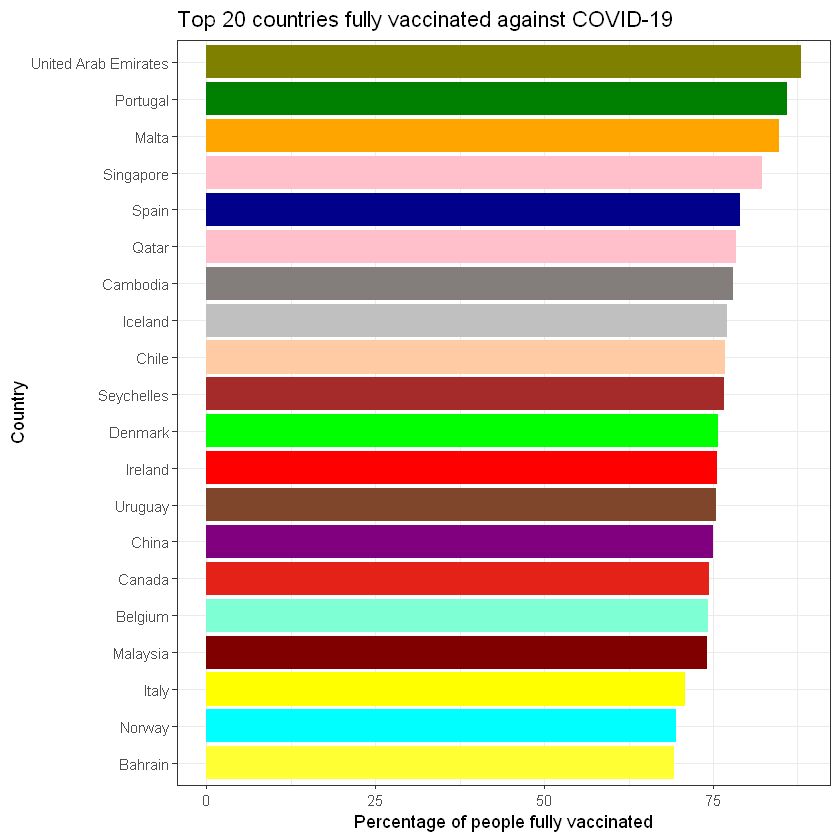

In [3]:
#List of Top 20 fully vaccinated countries
fully_vacc_data  %>%
    arrange(desc(percent_full_vac)) %>%
    slice(1:20) %>%
    ggplot()+ 
    geom_bar(aes(x = reorder(country_name, percent_full_vac), 
                y=percent_full_vac,
                fill = country_name),
                show.legend = FALSE,
            stat="identity") +
    scale_fill_manual("Country", values=c("#FFFF33","#7FFFD4","#837E7C","#E42217","#FFCBA4",
                                          "#800080","#00FF00","#C0C0C0","#FF0000","#FFFF00",
                                          "#800000","#FFA500","#00FFFF","#008000","#FFC0CB",
                                          "#A52A2A","#FFC0CB","#00008B","#808000","#7F462C"))+
    coord_flip()+
    xlab("Country")+
    ylab("Percentage of people fully vaccinated") +
    ggtitle("Top 20 countries fully vaccinated against COVID-19")+
    theme_bw()

In [1]:
#Load data
data = read.csv("FINAL_DATA.csv")

In [5]:
str(data)

'data.frame':	220 obs. of  21 variables:
 $ COUNTRY_CODE               : Factor w/ 220 levels "ABW","AFG","AGO",..: 208 92 28 71 168 202 67 94 8 61 ...
 $ COUNTRY_NAME               : Factor w/ 220 levels "Afghanistan",..: 211 93 28 196 165 203 72 95 9 187 ...
 $ POPULATION                 : int  334998398 1339330514 213445417 67081000 142320790 82482383 68084217 85888910 45864941 47260584 ...
 $ TOTAL_CASES                : int  44408612 34081315 21597949 8449169 8027012 7654277 6869661 5784815 5268653 4982139 ...
 $ TOTAL_DEATHS               : int  715179 452290 601574 138584 224310 67623 114924 124075 115582 86917 ...
 $ TOTAL_VACCINATIONS         : num  4.16e+08 9.52e+08 2.47e+08 9.44e+07 9.45e+07 ...
 $ ONE_DOSE_VACCINATED        : int  233521350 683009792 151223500 49186920 49463056 54497626 54375564 48474187 30878639 37819556 ...
 $ FULLY_VACCINATED           : int  203896677 268974581 105063574 45073591 45028077 46903485 47124949 24169335 24392652 32494889 ...
 $ FIRST_VACCINE

In [10]:
#this code extrac
urbR= data$URBANISATION_RATE
urbYC = data$URBANISATION_YEARLY_CHANG
gdppc= data$GDP_PER_CAP
density = data$DENSITY
infr = data$INFECTION_RATE_PER_100/1000
vacr = data$FULLY_VACCINATED/data$POPULATION


In [24]:
boom <- data.frame(data$URBANISATION_RATE, data$URBANISATION_YEARLY_CHANG, data$GDP_PER_CAP, data$DENSITY)
colnames(boom) = c("URBANISATION_RATE", "URBANISATION_YEARLY_CHANGE", "GDP_PER_CAP", "DENSITY")
str(boom)

 URBANISATION_RATE URBANISATION_YEARLY_CHANGE  GDP_PER_CAP    
 Min.   :  0.00    Min.   :-1.230             Min.   :   752  
 1st Qu.: 42.45    1st Qu.: 0.610             1st Qu.:  5209  
 Median : 62.55    Median : 1.335             Median : 14478  
 Mean   : 60.64    Mean   : 1.657             Mean   : 23044  
 3rd Qu.: 81.12    3rd Qu.: 2.560             3rd Qu.: 34612  
 Max.   :100.00    Max.   : 5.430             Max.   :139100  
    DENSITY        
 Min.   :    0.03  
 1st Qu.:   33.55  
 Median :   93.87  
 Mean   :  322.12  
 3rd Qu.:  212.39  
 Max.   :15611.50  

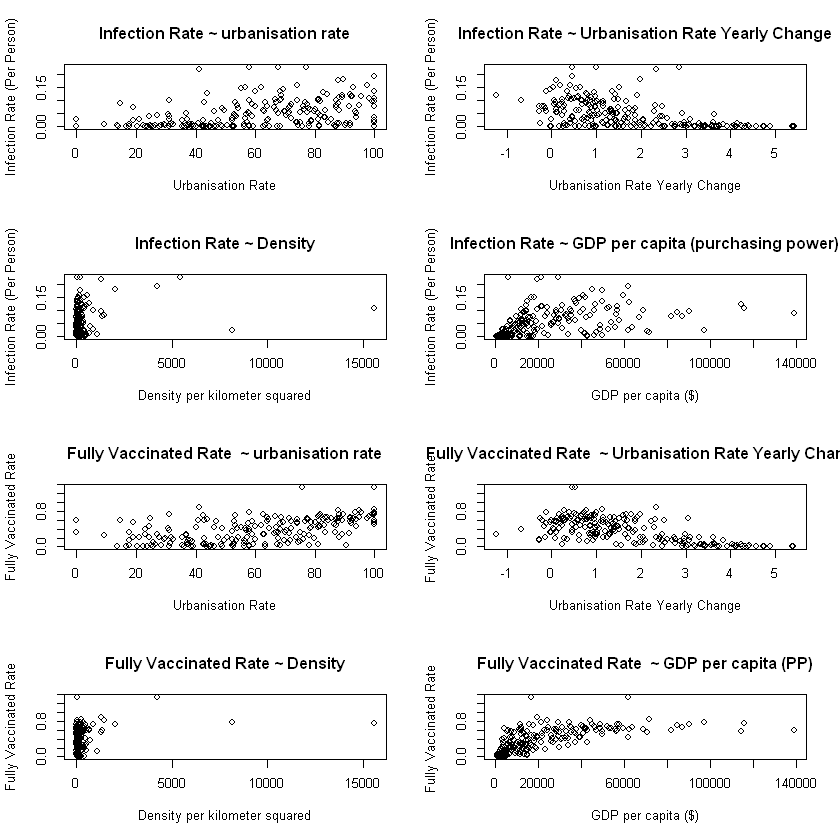

In [16]:
#this code created the scatter plots for the population varaibles and gdp per cap against infection and vaccination rates.
par(mfrow=c(4,2))

plot(urbR,infr,main="Infection Rate ~ urbanisation rate",ylab="Infection Rate (Per Person)",xlab="Urbanisation Rate")
plot(urbYC,infr,main="Infection Rate ~ Urbanisation Rate Yearly Change",ylab="Infection Rate (Per Person)",xlab="Urbanisation Rate Yearly Change")
plot(density,infr,main="Infection Rate ~ Density",ylab="Infection Rate (Per Person)",xlab="Density per kilometer squared")
plot(gdppc,infr,main="Infection Rate ~ GDP per capita (purchasing power)",ylab="Infection Rate (Per Person)",xlab="GDP per capita ($)")


plot(urbR,vacr,main="Fully Vaccinated Rate  ~ urbanisation rate",ylab="Fully Vaccinated Rate",xlab="Urbanisation Rate")
plot(urbYC,vacr,main="Fully Vaccinated Rate  ~ Urbanisation Rate Yearly Change",ylab="Fully Vaccinated Rate ",xlab="Urbanisation Rate Yearly Change")
plot(density,vacr,main="Fully Vaccinated Rate ~ Density",ylab="Fully Vaccinated Rate",xlab="Density per kilometer squared")
plot(gdppc,vacr,main="Fully Vaccinated Rate  ~ GDP per capita (PP)",ylab="Fully Vaccinated Rate ",xlab="GDP per capita ($)")

In [1]:
#Load data
data = read.csv("FINAL_DATA.csv")

In [2]:
summary(data)
library(corrgram)

 COUNTRY_CODE       COUNTRY_NAME         POPULATION         TOTAL_CASES      
 Length:220         Length:220         Min.   :1.647e+03   Min.   :       0  
 Class :character   Class :character   1st Qu.:5.599e+05   1st Qu.:   10734  
 Mode  :character   Mode  :character   Median :5.880e+06   Median :  112164  
                                       Mean   :3.511e+07   Mean   : 1089328  
                                       3rd Qu.:2.416e+07   3rd Qu.:  533891  
                                       Max.   :1.398e+09   Max.   :44408612  
                                                                             
  TOTAL_DEATHS      TOTAL_VACCINATIONS  ONE_DOSE_VACCINATED FULLY_VACCINATED   
 Min.   :     0.0   Min.   :1.936e+03   Min.   :9.680e+02   Min.   :9.680e+02  
 1st Qu.:   128.8   1st Qu.:2.183e+05   1st Qu.:1.337e+05   1st Qu.:8.982e+04  
 Median :  1492.5   Median :1.790e+06   Median :8.820e+05   Median :7.085e+05  
 Mean   : 22167.7   Mean   :3.041e+07   Mean   :1.757e+0

Warning message:
"package 'corrgram' was built under R version 4.1.2"


In [3]:

names(data)
tavg = data$AVG_TEMPARATURE
prcp = data$PERCIPITATION
infr = data$INFECTION_RATE_PER_100/100
vacr = data$FULLY_VACCINATED/data$POPULATION

[1] "COUNTRY_CODE"                "COUNTRY_NAME"               
 [3] "POPULATION"                  "TOTAL_CASES"                
 [5] "TOTAL_DEATHS"                "TOTAL_VACCINATIONS"         
 [7] "ONE_DOSE_VACCINATED"         "FULLY_VACCINATED"           
 [9] "FIRST_VACCINE_DATE"          "LAST_UPDATED_DATE"          
[11] "STRINGENCY_INDEX"            "URBANISATION_RATE"          
[13] "URBANISATION_YEARLY_CHANGE"  "GDP_PER_CAP"                
[15] "DENSITY"                     "AVG_TEMPARATURE"            
[17] "PRECIPITATION"               "INFECTION_RATE_PER_1000"    
[19] "DEATHS_PER_1000"             "TOTAL_VACCINATIONS_PER_1000"
[21] "OECD_COUNTRY"

Installing package into 'C:/Users/james/Documents/R/win-library/4.1'
(as 'lib' is unspecified)

also installing the dependencies 'TSP', 'qap', 'gclus', 'registry'




package 'TSP' successfully unpacked and MD5 sums checked
package 'qap' successfully unpacked and MD5 sums checked
package 'gclus' successfully unpacked and MD5 sums checked
package 'registry' successfully unpacked and MD5 sums checked
package 'seriation' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\james\AppData\Local\Temp\RtmpMbHNYK\downloaded_packages


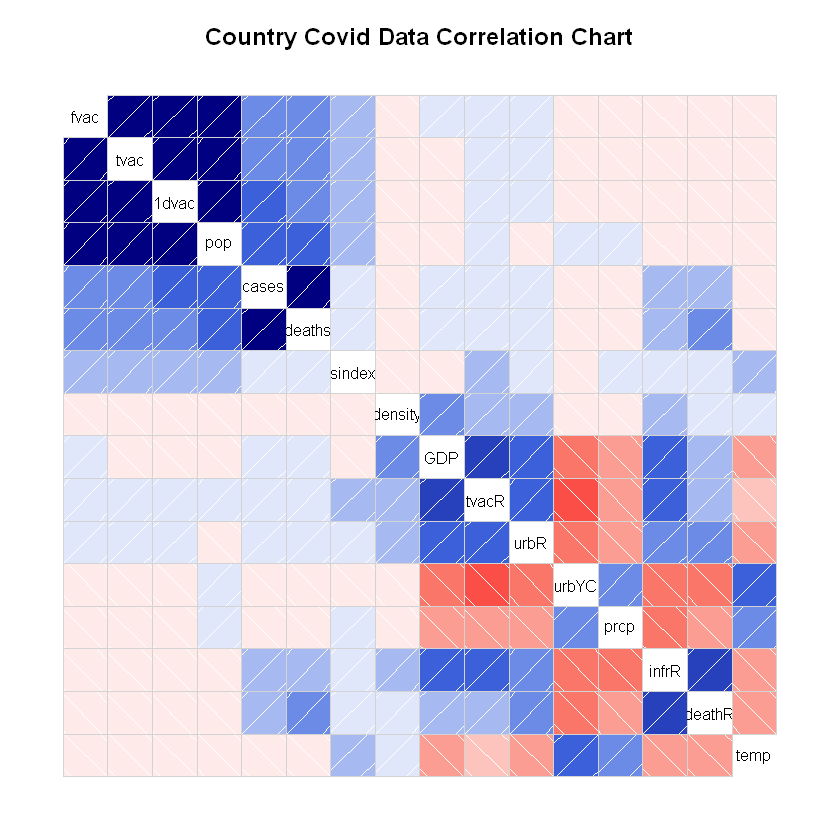

In [6]:
install.packages('seriation')
par(mfrow=c(1,1))
colnames(data) = c("code","name","population","infections","deaths","total_vac","1dose_vac","fully_vac","firstdate","lastdate","stringency","urbanisation_R","urbanisation_YC","GDP","density","temp","prcp","infection_R","death_R","total_vac_R","OECD")
colnames(data) = c("code","name","pop","cases","deaths","tvac","1dvac","fvac","firstdate","lastdate","sindex","urbR","urbYC","GDP","density","temp","prcp","infrR","deathR","tvacR","oecd")
corrgram(data, 
         order="OLO",
         abs=TRUE, 
         cex=1.2,
         main="Country Covid Data Correlation Chart")